In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
#!pip3 install tensorflow

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Currency/Train'
valid_path = 'Currency/Test'

In [4]:
# useful for getting number of output classes
folders = glob('Currency/Train/*')

In [5]:
folders

['Currency/Train\\1Hundrednote',
 'Currency/Train\\2Hundrednote',
 'Currency/Train\\2Thousandnote',
 'Currency/Train\\5Hundrednote',
 'Currency/Train\\Fiftynote',
 'Currency/Train\\Tennote',
 'Currency/Train\\Twentynote']

In [6]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

C:\Users\bhara\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [9]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Currency/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [10]:
test_set = test_datagen.flow_from_directory('Currency/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 51 images belonging to 7 classes.


In [11]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit(training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=175,
  validation_steps=50
)

C:\Users\bhara\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/90


C:\Users\bhara\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/175 ━━━━━━━━━━━━━━━━━━━━ 1:48 638ms/step - accuracy: 0.1303 - loss: 15.1819

C:\Users\bhara\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.1307 - loss: 16.9435 - val_accuracy: 0.1176 - val_loss: 6.5177
Epoch 2/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.1380 - loss: 4.1463 - val_accuracy: 0.1176 - val_loss: 2.2944
Epoch 3/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.1759 - loss: 1.9801 - val_accuracy: 0.1569 - val_loss: 1.9277
Epoch 4/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.2469 - loss: 1.9236 - val_accuracy: 0.2549 - val_loss: 1.9252
Epoch 5/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.2814 - loss: 1.8589 - val_accuracy: 0.2745 - val_loss: 1.7379
Epoch 6/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.4041 - loss: 1.5510 - val_accuracy: 0.4902 - val_loss: 1.4834
Epoch 7/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.4511 - loss: 1.4365 - val_accuracy: 0.3137 - val_loss: 1.4596
Epoch 8/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5361 - loss: 1.2607 - val_accura

Epoch 51/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9871 - loss: 0.0254 - val_accuracy: 0.7451 - val_loss: 1.6921
Epoch 52/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9936 - loss: 0.0353 - val_accuracy: 0.6863 - val_loss: 1.8278
Epoch 53/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 0.7059 - val_loss: 1.8378
Epoch 54/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9870 - loss: 0.0407 - val_accuracy: 0.7059 - val_loss: 1.8650
Epoch 55/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.6275 - val_loss: 2.0549
Epoch 56/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9806 - loss: 0.0315 - val_accuracy: 0.6667 - val_loss: 1.8793
Epoch 57/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.7451 - val_loss: 1.7148
Epoch 58/90
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 1.0000 - loss: 0

In [12]:
r.history

{'accuracy': [0.13071896135807037,
  0.13725490868091583,
  0.1764705926179886,
  0.24836601316928864,
  0.2810457646846771,
  0.40522876381874084,
  0.45098039507865906,
  0.5359477400779724,
  0.4444444477558136,
  0.5490196347236633,
  0.6666666865348816,
  0.7254902124404907,
  0.7777777910232544,
  0.8104575276374817,
  0.8104575276374817,
  0.8758170008659363,
  0.8562091588973999,
  0.8888888955116272,
  0.8954248428344727,
  0.8823529481887817,
  0.9084967374801636,
  0.9215686321258545,
  0.9542483687400818,
  0.9477124214172363,
  0.9803921580314636,
  0.9738562107086182,
  0.9869281053543091,
  0.9869281053543091,
  0.9869281053543091,
  0.9934640526771545,
  0.9869281053543091,
  0.9869281053543091,
  0.9869281053543091,
  0.9869281053543091,
  0.9869281053543091,
  0.9934640526771545,
  0.9869281053543091,
  0.9803921580314636,
  0.9607843160629272,
  0.9673202633857727,
  0.9738562107086182,
  0.9934640526771545,
  0.9869281053543091,
  0.9803921580314636,
  0.98692810535

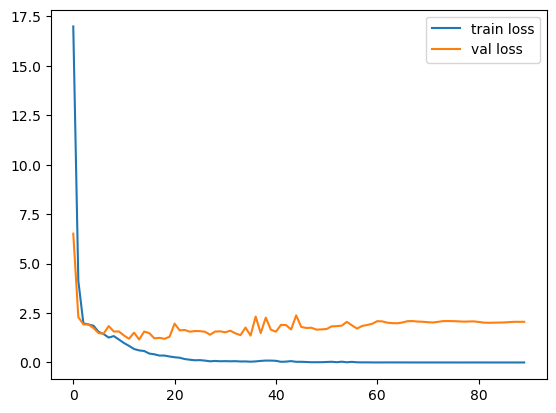

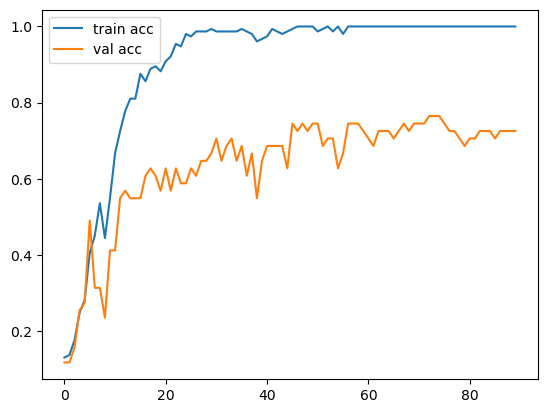

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# save it as a h5 file


from tensorflow.keras.models import load_model

Classifier.save('model_Classifier_E5_SPE50.h5')


# New Model save
Classifier.export("New_save_Model")

In [14]:
y_pred = Classifier.predict(test_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 708ms/step


In [15]:
y_pred

array([[1.75424229e-05, 5.99457262e-10, 5.81997961e-09, 9.99981165e-01,
        5.97214989e-09, 9.87164128e-10, 1.26538384e-06],
       [4.06900398e-08, 7.74920627e-04, 3.26114170e-11, 3.68069448e-02,
        1.94059851e-07, 9.60072219e-01, 2.34559341e-03],
       [9.57760785e-05, 5.75425775e-12, 9.99904156e-01, 2.12098765e-08,
        2.91615621e-11, 7.27436503e-13, 4.92802577e-10],
       [4.36009259e-07, 6.02305045e-06, 5.06636466e-09, 9.96533513e-01,
        3.45023256e-03, 4.26073848e-06, 5.40119527e-06],
       [4.08834581e-14, 1.15194940e-03, 1.30699548e-10, 8.63847509e-03,
        1.48443244e-15, 1.68561255e-05, 9.90192771e-01],
       [1.97012050e-04, 5.78274856e-15, 1.26093699e-12, 1.80268245e-07,
        9.99763548e-01, 1.67837779e-08, 3.92367838e-05],
       [6.07142558e-10, 1.55815333e-10, 1.00000000e+00, 3.67901473e-11,
        2.58026434e-10, 1.05169790e-18, 1.32300778e-14],
       [2.73634942e-14, 9.99999881e-01, 2.99884836e-15, 1.87826893e-10,
        1.44814336e-13, 3

In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [17]:
y_pred

array([3, 5, 2, 3, 6, 4, 2, 1, 5, 5, 4, 3, 3, 1, 0, 4, 3, 3, 2, 0, 2, 5,
       3, 1, 0, 6, 2, 4, 5, 3, 3, 4, 4, 1, 1, 4, 0, 2, 6, 2, 0, 3, 3, 5,
       3, 1, 3, 1, 3, 3, 3], dtype=int64)

In [19]:
img

NameError: name 'img' is not defined

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model=load_model('model_Classifier.h5')

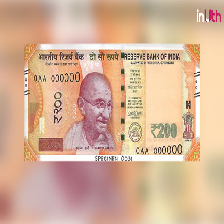

In [22]:
img=image.load_img('Currency/Test/2Hundrednote/1.jpg',target_size=(224,224))
img

In [23]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [24]:
result = Classifier.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


array([[0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
pred=np.argmax(model.predict(test_image), axis=1)

#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
[1]
[1]
200


In [112]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

[6]
[6]
20


In [95]:
a==0

NameError: name 'a' is not defined

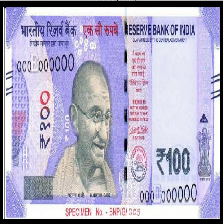

In [43]:
img=image.load_img('Currency/Test/1Hundrednote/1.jpg',target_size=(224,224))
img

In [44]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [45]:
result = Classifier.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [122]:
pred=np.argmax(model.predict(test_image), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [27]:
a

NameError: name 'a' is not defined

In [ ]:
img=image.load_img('Currency/Test/5Hundrednote/12.jpg',target_size=(224,224))
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [ ]:
result = Classifier.predict(test_image)
result

In [ ]:
pred=np.argmax(model.predict(test_image), axis=1)

In [46]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

[0]
[0]
100


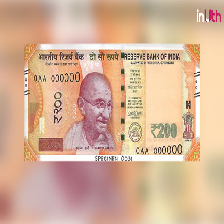

In [51]:
img=image.load_img('Currency/Test/2Hundrednote/1.jpg',target_size=(224,224))
img

In [52]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)


In [53]:
result = Classifier.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
pred=np.argmax(model.predict(test_image), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [55]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

[1]
[1]
200


In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
img=image.load_img('Currency/Test/Twentynote/1.jpg',target_size=(224,224))
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

In [ ]:
pred=np.argmax(model.predict(test_image), axis=1)

In [ ]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

In [ ]:
pred=np.argmax(model.predict(test_image), axis=1)

In [ ]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

In [ ]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit(training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=175,
  validation_steps=50
)

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
img=image.load_img('Currency/Test/2Thousandnote/1.jpg',target_size=(224,224))
img

In [ ]:
img=image.load_img('Currency/Test/2Thousandnote/1.jpg',target_size=(224,224))
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result


In [ ]:
pred=np.argmax(model.predict(test_image), axis=1)

In [ ]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

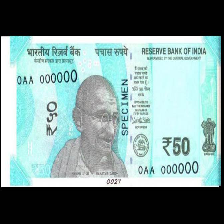

In [47]:
img=image.load_img('Currency/Test/Fiftynote/29.jpg',target_size=(224,224))
img

In [48]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
pred=np.argmax(model.predict(test_image), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [50]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

[4]
[4]
50


In [ ]:
img=image.load_img('Currency/Test/2Thousandnote/3.jpg',target_size=(224,224))
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

In [ ]:
pred=np.argmax(model.predict(test_image), axis=1)

In [ ]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

In [ ]:
img=image.load_img('Currency/Test/2Thousandnote/33.jpg',target_size=(224,224))
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

In [ ]:
pred=np.argmax(model.predict(test_image), axis=1)

In [ ]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

In [ ]:
img=image.load_img('Currency/Test/5Hundrednote/33.jpg',target_size=(224,224))
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

In [ ]:
pred=np.argmax(model.predict(test_image), axis=1)

In [ ]:
#res = model_save.predict(image)
#print(result)
#pred = np.argmax(a, axis=1)
print(pred)
print(pred)
if pred[0] == 0:
    print('100')
elif pred[0] == 1:
    print('200')
elif pred[0] == 2:
    print('2000')
elif pred[0] == 3:
    print('500')
elif pred[0] == 4:
    print('50')
elif pred[0] == 5:
    print('10')
elif pred[0] == 6:
    print('20')
else:
    print('not indian cuurency')

In [ ]:
img=image.load_img('Currency/Test/5Hundrednote/33.jpg',target_size=(224,224))
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result